In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json

def process_json_files(data_filenames, whitebox_json_path, mean_cosin_json_path):
    def get_keys_by_proof_status(filename):
        with open(filename, 'r') as file:
            data = json.load(file)
        keys_with_proof = []
        keys_without_proof = []
        for key, value in data.items():
            if value[0] == "ProverResult.PROOF_FOUND":
                keys_with_proof.append(key)
            else:
                keys_without_proof.append(key)
        return keys_with_proof, keys_without_proof

    def find_positions_in_json(json_filename, search_list):
        with open(json_filename, 'r') as file:
            json_data = json.load(file)
        return [json_data.index(item) for item in search_list if item in json_data]

    def extract_values_at_positions(json_filename, positions):
        with open(json_filename, 'r') as file:
            json_data = json.load(file)
        return [json_data[position] for position in positions if 0 <= position < len(json_data)]

    def calculate_stats(values):
        if not values:
            return None, None, None, None
        
        min_value = min(values)
        max_value = max(values)
        min_index = values.index(min_value)
        max_index = values.index(max_value)
        
        return min_value, max_value, min_index, max_index

    results = {}
    for label, filename in data_filenames.items():
        keys_with_proof, keys_without_proof = get_keys_by_proof_status(filename)

        # Process keys with proof
        positions_with_proof = find_positions_in_json(whitebox_json_path, keys_with_proof)
        cosin_values_with_proof = extract_values_at_positions(mean_cosin_json_path, positions_with_proof)
        avg_cosin_with_proof = (sum(cosin_values_with_proof) / len(cosin_values_with_proof)) if cosin_values_with_proof else None
        min_with_proof, max_with_proof, min_index_with, max_index_with = calculate_stats(cosin_values_with_proof)

        # Process keys without proof
        positions_without_proof = find_positions_in_json(whitebox_json_path, keys_without_proof)
        cosin_values_without_proof = extract_values_at_positions(mean_cosin_json_path, positions_without_proof)
        avg_cosin_without_proof = (sum(cosin_values_without_proof) / len(cosin_values_without_proof)) if cosin_values_without_proof else None
        min_without_proof, max_without_proof, min_index_without, max_index_without = calculate_stats(cosin_values_without_proof)

        results[label] = {
            'avg_cosin_with_proof': avg_cosin_with_proof,
            'min_with_proof': min_with_proof,
            'max_with_proof': max_with_proof,
            'min_key_with_proof': keys_with_proof[min_index_with] if min_index_with is not None else None,
            'max_key_with_proof': keys_with_proof[max_index_with] if max_index_with is not None else None,
            'avg_cosin_without_proof': avg_cosin_without_proof,
            'min_without_proof': min_without_proof,
            'max_without_proof': max_without_proof,
            'min_key_without_proof': keys_without_proof[min_index_without] if min_index_without is not None else None,
            'max_key_without_proof': keys_without_proof[max_index_without] if max_index_without is not None else None
        }

    return results

# File paths and labels
data_filenames = {
    'mini_added': 'noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-MiniLM-L6-v2_addedAxiom8000_2ndRun.json',
    'mini': 'noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-MiniLM-L6-v2_None_2ndRun.json',
    'mpnet_added': 'noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-mpnet-base-v2_addedAxiom8000_2ndRun.json',
    'mpnet': 'noauto_whitebox_union_n160_b20_k3_timer_union_axioms_all-mpnet-base-v2_None_2ndRun.json'
}

# Paths to the JSON files
whitebox_json_path = "whitebox_candidates.json"
mean_cosin_json_path = "selection/mean_cosin_all.json"

results = process_json_files(data_filenames, whitebox_json_path, mean_cosin_json_path)

for label, data in results.items():
    print(f"{label}:")
    print(f"  Average Cosine Sim. (with proof): {data['avg_cosin_with_proof']}")
    print(f"  Min/Max Cosine Sim. (with proof): {data['min_with_proof']} ({data['min_key_with_proof']}), {data['max_with_proof']} ({data['max_key_with_proof']})")
    print(f"  Average Cosine Sim. (without proof): {data['avg_cosin_without_proof']}")
    print(f"  Min/Max Cosine Sim. (without proof): {data['min_without_proof']} ({data['min_key_without_proof']}), {data['max_without_proof']} ({data['max_key_without_proof']})")

mini_added:
  Average Cosine Sim. (with proof): 0.4093764091509258
  Min/Max Cosine Sim. (with proof): 0.23014098610728978 (./goals/whitebox/whiteBoxTruthTest3942.adimen.tstp), 0.6223376236855984 (./goals/whitebox/whiteBoxTruthTest0474.adimen.tstp)
  Average Cosine Sim. (without proof): 0.4643365026748644
  Min/Max Cosine Sim. (without proof): 0.2537629470229149 (./goals/whitebox/whiteBoxTruthTest5915.adimen.tstp), 0.6877664715051651 (./goals/whitebox/whiteBoxTruthTest0215.adimen.tstp)
mini:
  Average Cosine Sim. (with proof): 0.4095469673588206
  Min/Max Cosine Sim. (with proof): 0.27939028292894363 (./goals/whitebox/whiteBoxTruthTest6458.adimen.tstp), 0.5880962116643786 (./goals/whitebox/whiteBoxTruthTest4803.adimen.tstp)
  Average Cosine Sim. (without proof): 0.45710572797153054
  Min/Max Cosine Sim. (without proof): 0.23014098610728978 (./goals/whitebox/whiteBoxTruthTest3942.adimen.tstp), 0.6877664715051651 (./goals/whitebox/whiteBoxTruthTest0215.adimen.tstp)
mpnet_added:
  Average

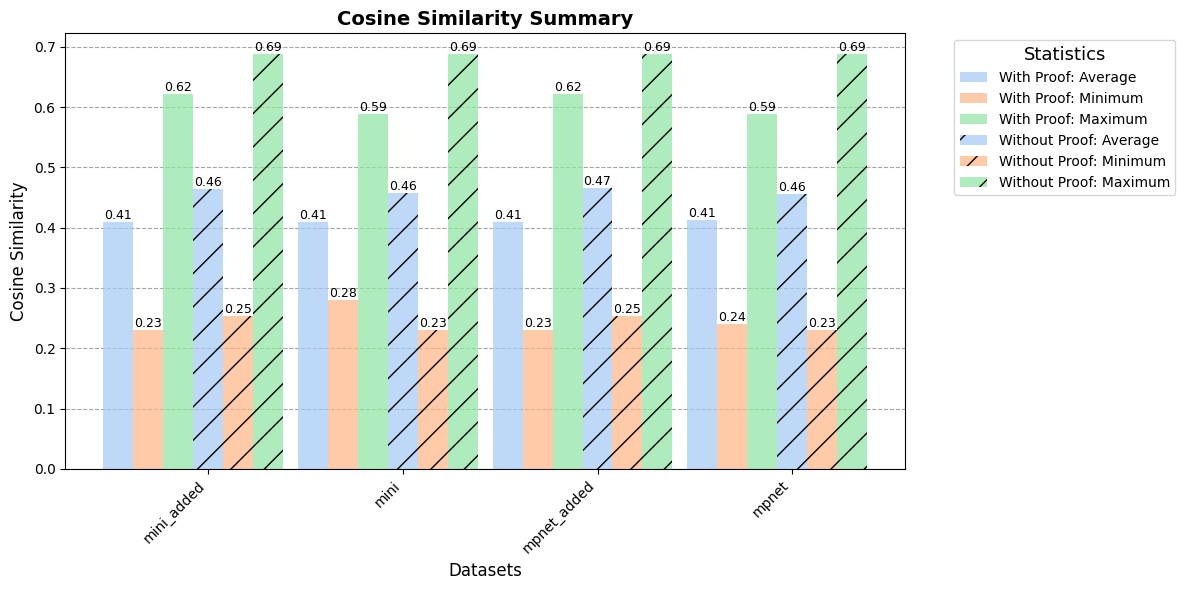

In [3]:
def summary_grafic(results, title: str, output_path: str):
    # Extrahieren der Dataset-Labels und Statistiken
    dataset_labels = list(results.keys())

    # Vorbereiten der Daten für verschiedene Beweisstatus
    stats_with_proof = np.array([
        [
            results[label]['avg_cosin_with_proof'],
            results[label]['min_with_proof'],
            results[label]['max_with_proof']
        ] for label in dataset_labels
    ])

    stats_without_proof = np.array([
        [
            results[label]['avg_cosin_without_proof'],
            results[label]['min_without_proof'],
            results[label]['max_without_proof']
        ] for label in dataset_labels
    ])

    # Diagramm mit zusätzlichem Abstand einrichten
    fig, ax = plt.subplots(figsize=(12, 6))
    total_bar_width = 1.0
    bar_width = total_bar_width / 6
    bar_spacing = bar_width / 2  # Abstand zwischen verschiedenen Datasets einstellen
    index = np.arange(len(dataset_labels)) * (total_bar_width + bar_spacing)  # Raum zwischen Kategorien erhöhen

    # Farbpalette wählen
    colors = sns.color_palette('pastel', 3)

    # Statistiken für "mit Beweis" darstellen
    bars_with_proof = []
    for i, (stat_label, color) in enumerate(zip(["Average", "Minimum", "Maximum"], colors)):
        bars = ax.bar(index + i * bar_width, stats_with_proof[:, i], bar_width,
                      label=f'With Proof: {stat_label}', color=color, alpha=0.7)
        bars_with_proof.append(bars)

    # Statistiken für "ohne Beweis" darstellen
    bars_without_proof = []
    for i, (stat_label, color) in enumerate(zip(["Average", "Minimum", "Maximum"], colors)):
        bars = ax.bar(index + (3 + i) * bar_width, stats_without_proof[:, i], bar_width,
                      label=f'Without Proof: {stat_label}', color=color, hatch='/', alpha=0.7)
        bars_without_proof.append(bars)

    # Beschriftungen über den Balken hinzufügen
    for bars in bars_with_proof + bars_without_proof:
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                f'{yval:.2f}',
                ha='center', va='bottom', fontsize=9, color='black'
            )

    # Labels, Achsen und Titel setzen
    ax.set_xlabel('Datasets', fontsize=12)
    ax.set_ylabel('Cosine Similarity', fontsize=12)
    ax.set_title(f'{title}', fontsize=14, fontweight='bold')
    ax.set_xticks(index + total_bar_width / 2)
    ax.set_xticklabels(dataset_labels, fontsize=10, rotation=45, ha='right')

    # Legende außerhalb des Diagramms positionieren
    ax.legend(title='Statistics', title_fontsize='13', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Horizontale Gitterlinien für bessere Lesbarkeit
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Diagramm speichern
    plt.tight_layout()
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Beispielverwendung
summary_grafic(results, "Cosine Similarity Summary", 'cosine_similarity_summary.pdf')